# AirBnB Case Study

This is a sample solution to the case study problem named 'AirBnB case study'. This solution is one of the many potential ways to solve this case study. Please take these solutions as more of a 'guidance' rather than a 'fixed/perfect' solution. You can take away how to solve for certain issues, but should try to iterate and create/innovate new ways to solve the same issues your way. 

--------------

## Importing Libraries

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data from the database.

In [220]:
df_listings = pd.read_sql_table('listings', 'sqlite:///data/airbnb/airbnb.db')
df_reviews = pd.read_sql_table('reviews', 'sqlite:///data/airbnb/airbnb.db')
df_hosts = pd.read_sql_table('hosts', 'sqlite:///data/airbnb/airbnb.db')
df_calendar = pd.read_sql_table('calendar', 'sqlite:///data/airbnb/airbnb.db')

------------

### Just looking at the data headers and missing values

#### df_listings

In [221]:
df_listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


<AxesSubplot:>

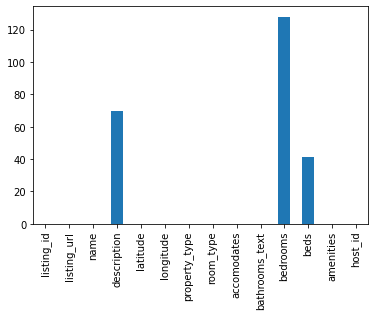

In [222]:
df_listings.isna().sum().plot(kind='bar')

In [223]:
df_listings.shape

(1749, 14)

#### df_reviews

In [224]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


<AxesSubplot:>

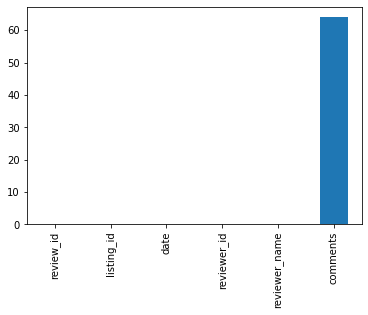

In [225]:
df_reviews.isna().sum().plot(kind='bar')

In [226]:
df_reviews.shape

(62987, 6)

#### df_hosts

In [227]:
df_hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",None
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


<AxesSubplot:>

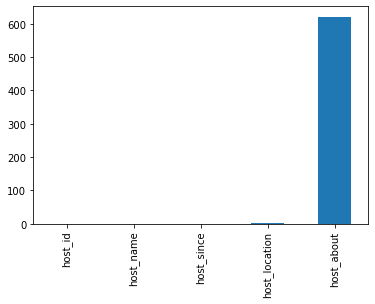

In [228]:
df_hosts.isna().sum().plot(kind='bar')

In [229]:
df_hosts.shape

(1111, 5)

#### df_calendar

In [230]:
df_calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,False,56.0,56.0,3,5
1,2,22742449,2022-11-13,True,95.0,95.0,2,99
2,3,34621717,2022-04-17,False,75.0,75.0,2,1125
3,4,38281744,2022-01-31,True,150.0,150.0,1,1000
4,5,18835003,2022-05-21,False,100.0,100.0,2,1125


<AxesSubplot:>

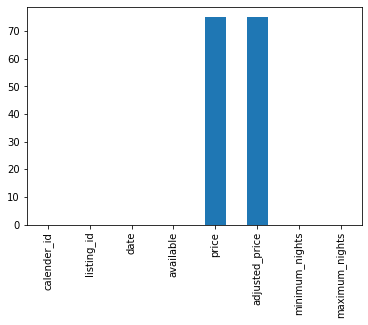

In [231]:
df_calendar.isna().sum().plot(kind='bar')

In [232]:
df_calendar.shape

(319192, 8)

-------

In [233]:
df_calendar['listing_id'].nunique()

1749

## Calendar table
As can be seen, with the above dataset is that there are only 1749 unique listings in our dataset, whereas the total number of calendar_id is about 3.2 Lac. Meaning that one listing_id was listed on multiple days. 

But, for our model to work, what we need is to have one price for every listing_id

**To do this, we can follow multiple ways**
1. We can just take the mean for every listing_id

- But with that approach we do not factor in the recency bias that might have been introduced in the data. The price 5 years ago, is not as relevant today as the price 1 month ago. 

2. We can take the mean for last couple of months
- So if we want to factor in that approach maybe we can take only the average prices of the last 3-5 months. That can be a solution

3. You can also take an weighted average
- If you would rather not leave the earlier price points out and want to include them all in your average price calculation, you can even take all the price points but give less 'weightage' to the old prices while averaging.

### Taking average of all values that exist (First approach)

In [234]:
df_calendar.groupby('listing_id').mean()

,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
50904,167467.313187,0.725275,165.329670,160.241758,1.0,60.0
116134,160630.434146,0.814634,150.000000,150.000000,2.0,1125.0
218916,168487.049180,0.000000,85.000000,85.000000,1.0,50.0
224333,162076.883598,0.925926,16.000000,16.000000,14.0,365.0
224682,154916.494318,0.852273,87.272727,87.272727,2.0,30.0
...,...,...,...,...,...,...
53916524,162814.806763,0.937198,88.000000,88.000000,3.0,365.0
53928545,145458.251282,1.000000,49.000000,49.000000,20.0,1125.0
53929354,165054.617143,0.988571,90.000000,90.000000,1.0,365.0


### The last price approach

In [235]:
df_calendar.sort_values('date').groupby('listing_id').tail(1)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
105846,105847,41096855,2022-12-11,True,59.0,59.0,1,21
2405,2406,33192413,2022-12-15,False,34.0,34.0,1,1125
54351,54352,53035756,2022-12-15,True,55.0,55.0,1,1125
198581,198582,39905365,2022-12-16,True,40.0,40.0,13,1125
179920,179921,35906015,2022-12-16,True,129.0,129.0,1,13
...,...,...,...,...,...,...,...,...
196873,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
115452,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
253381,253382,51123661,2022-12-25,True,175.0,175.0,1,365
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


### The last 3 values sorted by date.

We are taking the last 3 prices when the property was listed, you can take last 2,4. This is upto you. Here i am taking the last 3 listed prices per listing_id

In [236]:
df_calendar.sort_values('date').groupby('listing_id').tail(3)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125
...,...,...,...,...,...,...,...,...
196873,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
115452,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
253381,253382,51123661,2022-12-25,True,175.0,175.0,1,365
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


In [237]:
# The last 3 values sorted by date
df_calendar_last_3 = df_calendar.sort_values('date').groupby('listing_id').tail(3)

In [238]:
df_calendar_last_3

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125
...,...,...,...,...,...,...,...,...
196873,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
115452,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
253381,253382,51123661,2022-12-25,True,175.0,175.0,1,365
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


### Checking if it worked the way we intended it to.

In [239]:
df_calendar_last_3[df_calendar_last_3['listing_id'] == 40628338]

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
266494,266495,40628338,2022-12-22,False,80.0,80.0,1,1125
136278,136279,40628338,2022-12-23,False,80.0,80.0,2,1125
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


#### As we can see for a particular listing_id we are only fetching the last 3 rows sorted by date

Now, for this session i am going to use the last 3 prices as my final table, this is subjective, you may do otherwise if you wish to.

In [240]:
df_calendar_last_3.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125


In [241]:
df_calendar_last_3.reset_index(level=0, inplace=True)

In [242]:
# Dropping the extra index column
df_calendar_last_3.drop(['index'],axis=1)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
1,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
2,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
3,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
4,171393,33716554,2022-12-08,False,75.0,75.0,2,1125
...,...,...,...,...,...,...,...,...
5242,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
5243,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
5244,253382,51123661,2022-12-25,True,175.0,175.0,1,365
5245,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


In [243]:
df_calendar_last_3.head()

,index,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
1,21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
2,312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
3,217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
4,171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125


<AxesSubplot:>

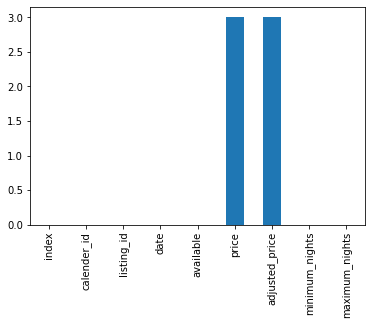

In [244]:
df_calendar_last_3.isna().sum().plot(kind='bar')

In [245]:
df_calendar_last_3[df_calendar_last_3['price'].isna()]

,index,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1189,127948,127949,45416364,2022-12-20,False,NaN,NaN,30,1125
1586,164594,164595,45416364,2022-12-21,False,NaN,NaN,30,1125
3962,257968,257969,45416364,2022-12-24,False,NaN,NaN,30,1125


We have a listing_id, which has no price available, we should drop this id, as we can't model any price for this.

### Let's drop these rows with empty price, as they will not be useful at all while modeling

In [246]:
df_calendar_last_3.shape

(5247, 9)

In [247]:
df_calendar_last_3.dropna().shape

(5244, 9)

In [248]:
df_calendar_last_3 = df_calendar_last_3.dropna()

### Now that for every listing_id we have last 3 values, we can average them into 1.

In [249]:
df_calendar_last_3_mean = df_calendar_last_3.groupby('listing_id').mean()

In [250]:
df_calendar_last_3_mean.reset_index(level=0, inplace=True)

In [251]:
df_calendar_last_3_mean

,listing_id,index,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,50904,166028.333333,166029.333333,0.0,166.666667,158.666667,1.0,60.0
1,116134,173486.666667,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
2,218916,163470.333333,163471.333333,0.0,85.000000,85.000000,1.0,50.0
3,224333,193002.333333,193003.333333,1.0,16.000000,16.000000,14.0,365.0
4,224682,111237.333333,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...,...,...
1743,53916524,65967.000000,65968.000000,1.0,88.000000,88.000000,3.0,365.0
1744,53928545,120817.666667,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
1745,53929354,163446.666667,163447.666667,1.0,90.000000,90.000000,1.0,365.0
1746,53949105,191384.000000,191385.000000,1.0,990.000000,990.000000,2.0,1125.0


In [252]:
df_calendar_last_3_mean.drop(['index'],axis=1)

,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,50904,166029.333333,0.0,166.666667,158.666667,1.0,60.0
1,116134,173487.666667,1.0,150.000000,150.000000,2.0,1125.0
2,218916,163471.333333,0.0,85.000000,85.000000,1.0,50.0
3,224333,193003.333333,1.0,16.000000,16.000000,14.0,365.0
4,224682,111238.333333,1.0,85.000000,85.000000,2.0,30.0
...,...,...,...,...,...,...,...
1743,53916524,65968.000000,1.0,88.000000,88.000000,3.0,365.0
1744,53928545,120818.666667,1.0,49.000000,49.000000,20.0,1125.0
1745,53929354,163447.666667,1.0,90.000000,90.000000,1.0,365.0
1746,53949105,191385.000000,1.0,990.000000,990.000000,2.0,1125.0


In [253]:
df_calendar_last_3_mean['listing_id'].nunique()

1748

As we can see, now we have a new dataframe with 1748 unique listing_id which we wanted and the value for these id's are the mean of the last 3 values sorted by date. The reason we have 1 less listing_id is that we had an listing_id where we did not have any price point.

## Now to look at other tables

### df_hosts

In [254]:
# Let's look at the host table first
df_hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",None
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [255]:
df_hosts.describe()

,host_id
count,1.111000e+03
mean,1.268568e+08
std,1.282286e+08
min,2.340770e+05
25%,2.361567e+07
50%,6.618861e+07
75%,2.143271e+08
max,4.373093e+08


<AxesSubplot:>

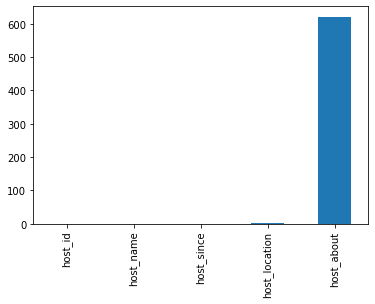

In [256]:
df_hosts.isna().sum().plot(kind='bar')

In [257]:
df_hosts.shape
# So we have a total of 1111 hosts

(1111, 5)

In [258]:
df_hosts['host_id'].nunique()

1111

- This also shows us that there are no duplicate values in the host table, this will help us when we are trying to join the tables.
- Some of the things that we can think of right of the bat is the host since column, we can create a new column that specifies the total months/years since joining. So, let's do just that

In [259]:
# df_hosts['host_since']

In [260]:
# basedate = pd.Timestamp('2022-04-12')
# days_since_joined = abs(df_hosts['host_since'] - basedate).dt.days
# days_since_joined

In [261]:
# df_hosts['days_since_joined'] = days_since_joined

In [262]:
# sns.kdeplot(df_hosts['days_since_joined'])

In [263]:
# for i in df_hosts['host_location'].unique():
#     print(i)

In [264]:
# def return_country(x):
#     try:
#         text_list = x.split(',')
#         if len(text_list) == 3:
#             return text_list[2]
#         else:
#             return text_list[0]
#     except:
#         return None
        
# def return_state(x):
#     try:        
#         text_list = x.split(',')
#         if len(text_list) == 3:
#             return text_list[1]
#         else:
#             return None
#     except:
#         return None
    
# def return_city(x):
#     try:        
#         text_list = x.split(',')
#         if len(text_list) == 3:
#             return text_list[0]
#         else:
#             return None
#     except:
#         return None

In [265]:
# df_hosts['host_location_country'] = df_hosts['host_location'].apply(return_country)
# df_hosts['host_location_state'] = df_hosts['host_location'].apply(return_state)
# df_hosts['host_location_city'] = df_hosts['host_location'].apply(return_city)

In [266]:
# df_hosts.head()

In [267]:
# df_hosts.groupby('host_location_country').count()

In [268]:
# df_hosts['host_location_country'].nunique()

In [269]:
# country_dic = {
#     'The Netherlands': 'Netherlands',
#     'Zeeland': 'Netherlands',
#     'BE': 'Belgium',
#     'Belgium': 'Belgium',
#     'België': 'Belgium',
#     'DK': 'Denmark',
#     'EE': 'Estonia',
#     'ES': 'Spain',
#     'FR' : 'France',
#     'GB': 'United Kingdom',
#     'IT': 'Italy',
#     'NL': 'Netherlands',
#     'TR': 'Turkey',
#     'US': 'United States'
#     }

In [270]:
# df_hosts['host_location_country']

In [271]:
# df_hosts['host_location_country'] = df_hosts['host_location_country'].map(country_dic).fillna(df_hosts['host_location_country'])

In [272]:
# df_hosts.groupby('host_location_country').count()

In [273]:
# df_hosts.head()

# todo - A lot of data cleaning needs to be done here

### todo - a nlp layer of sentence embedding with glove/word2vec can be used to give the text a single 300D embedding.

## df_reviews

In [274]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


In [275]:
df_reviews.shape

(62987, 6)

<AxesSubplot:>

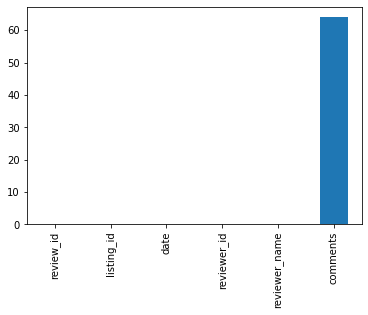

In [276]:
df_reviews.isna().sum().plot(kind='bar')

In [277]:
df_reviews.groupby('listing_id').count()['review_id']

listing_id
50904         2
116134      120
218916       28
224333        3
224682      349
           ... 
53522234      2
53538847      1
53600839      1
53819793      1
53825194      2
Name: review_id, Length: 1525, dtype: int64

We can see that a single listing has multiple reviews, so we will have to somehow reduce it to 1 average/collective review score per listing.

<AxesSubplot:xlabel='reviewer_id'>

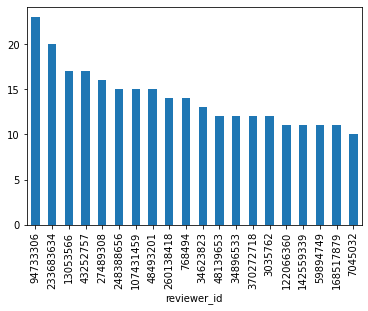

In [278]:
df_reviews.groupby('reviewer_id').count()['review_id'].sort_values(ascending=False)[:20].plot(kind='bar')

<AxesSubplot:xlabel='reviewer_id'>

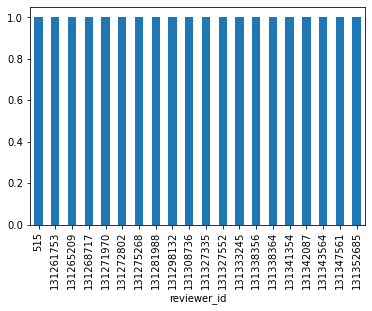

In [279]:
df_reviews.groupby('reviewer_id').count()['review_id'].sort_values(ascending=True)[:20].plot(kind='bar')

In [280]:
df_reviews.groupby('reviewer_id').count()['review_id'].describe()

count    58438.000000
mean         1.077843
std          0.459807
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         23.000000
Name: review_id, dtype: float64

Most of reviewers are unique, which is good as this means that not a few people were spamming reviews but rather different people reviewed different listings which is good for the authenticity of the data.

In [281]:
df_reviews.groupby('listing_id').count()['review_id'].describe()

count    1525.000000
mean       41.302951
std        64.773986
min         1.000000
25%         5.000000
50%        17.000000
75%        47.000000
max       648.000000
Name: review_id, dtype: float64

<AxesSubplot:xlabel='listing_id'>

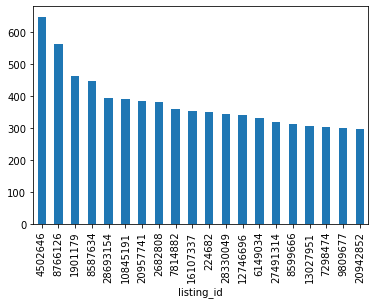

In [282]:
df_reviews.groupby('listing_id').count()['review_id'].sort_values(ascending=False)[:20].plot(kind='bar')

<AxesSubplot:xlabel='review_id', ylabel='Density'>

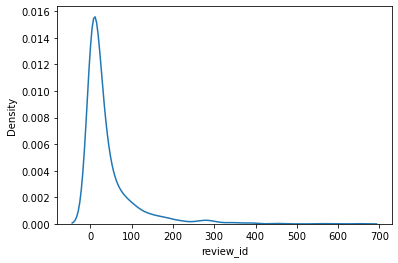

In [283]:
sns.kdeplot(df_reviews.groupby('listing_id').count()['review_id'])

<AxesSubplot:xlabel='listing_id'>

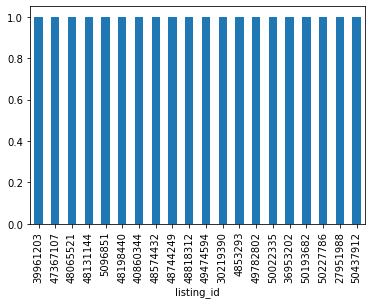

In [284]:
df_reviews.groupby('listing_id').count()['review_id'].sort_values(ascending=True)[:20].plot(kind='bar')

In [285]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


In [286]:
number_of_review_by_listing = df_reviews.groupby('listing_id').count()['review_id'].to_dict()

In [287]:
df_reviews['total_reviews_by_listing'] = df_reviews['listing_id'].map(number_of_review_by_listing)

In [288]:
df_reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,total_reviews_by_listing
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",120
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",120
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,120
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...,1
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...,1
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great,1
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2


In [289]:
basedate2 = pd.Timestamp('2022-04-12')
days_since_review = abs(df_reviews['date'] - basedate2).dt.days
days_since_review

0        2533
1         184
2        3690
3        3609
4        3143
         ... 
62982     128
62983     121
62984     112
62985     114
62986     110
Name: date, Length: 62987, dtype: int64

In [290]:
df_reviews['days_since_review'] = days_since_review

In [291]:
df_reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,total_reviews_by_listing,days_since_review
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2,2533
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2,184
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",120,3690
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",120,3609
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,120,3143
...,...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...,1,128
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...,1,121
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great,1,112
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2,114


In [292]:
def get_len(x):
    try:
        return len(x)
    except:
        return 0

In [293]:
df_reviews['comment_length'] = df_reviews['comments'].apply(get_len)

In [294]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,total_reviews_by_listing,days_since_review,comment_length
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2,2533,418
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2,184,93
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",120,3690,327
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",120,3609,543
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,120,3143,381


## todo- add nlp to this section as well

In [295]:
total_reviews = df_reviews.groupby('listing_id').count()[['review_id']]

In [296]:
total_reviews.reset_index(level=0, inplace=True)

In [297]:
total_reviews.columns = ['listing_id','total_reviews']

In [298]:
total_reviews

,listing_id,total_reviews
0,50904,2
1,116134,120
2,218916,28
3,224333,3
4,224682,349
...,...,...
1520,53522234,2
1521,53538847,1
1522,53600839,1
1523,53819793,1


In [299]:
recent_reviews = df_reviews.groupby('listing_id').mean()[['days_since_review']]

In [300]:
recent_reviews.reset_index(level=0, inplace=True)

In [301]:
recent_reviews

,listing_id,days_since_review
0,50904,1358.500000
1,116134,1540.908333
2,218916,2438.250000
3,224333,1613.000000
4,224682,1752.143266
...,...,...
1520,53522234,124.000000
1521,53538847,128.000000
1522,53600839,121.000000
1523,53819793,112.000000


In [302]:
avg_comments = df_reviews.groupby('listing_id').mean()[['comment_length']]

In [303]:
avg_comments.reset_index(level=0, inplace=True)

In [304]:
avg_comments

,listing_id,comment_length
0,50904,255.500000
1,116134,265.266667
2,218916,385.678571
3,224333,193.666667
4,224682,252.624642
...,...,...
1520,53522234,211.500000
1521,53538847,177.000000
1522,53600839,1282.000000
1523,53819793,12.000000


In [305]:
df_reviews_consolidated_2 = pd.merge(total_reviews, recent_reviews, on='listing_id', how='inner')

In [306]:
df_reviews_consolidated = pd.merge(df_reviews_consolidated_2, avg_comments, on='listing_id', how='inner')

In [307]:
df_reviews_consolidated

,listing_id,total_reviews,days_since_review,comment_length
0,50904,2,1358.500000,255.500000
1,116134,120,1540.908333,265.266667
2,218916,28,2438.250000,385.678571
3,224333,3,1613.000000,193.666667
4,224682,349,1752.143266,252.624642
...,...,...,...,...
1520,53522234,2,124.000000,211.500000
1521,53538847,1,128.000000,177.000000
1522,53600839,1,121.000000,1282.000000
1523,53819793,1,112.000000,12.000000


## df_listings

In [308]:
df_listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [309]:
df_listings.shape

(1749, 14)

<AxesSubplot:>

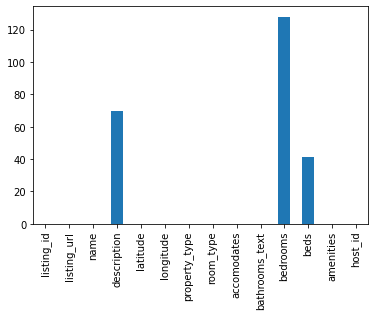

In [310]:
df_listings.isna().sum().plot(kind='bar')

In [311]:
df_listings['listing_id'].nunique()

1749

So for every listing we have 1 listing each. This should be relatively simple to attach to the calendar table

# Looking at the final tables after the cleaning and feature creation

# Amalgamation of data